In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# application metadata

In [6]:
application_metadata = pd.read_csv('data/application_metadata - application_metadata.csv')

In [7]:
application_metadata.head()

,customer_ref,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0


<Axes: xlabel='random_noise_1', ylabel='Count'>

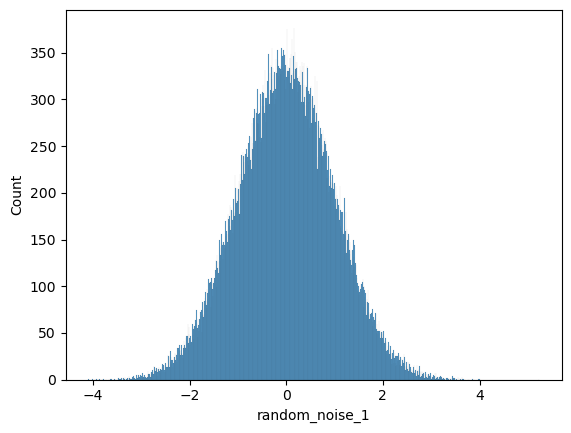

In [13]:
sns.histplot(data=application_metadata, x='random_noise_1', bins=1000)

In [14]:
application_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_ref                89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

In [17]:
application_metadata['application_hour'].value_counts()

application_hour
4     3877
6     3870
10    3845
5     3814
8     3806
18    3797
17    3786
12    3779
7     3763
11    3763
20    3754
2     3748
19    3743
14    3728
21    3725
9     3725
22    3710
13    3697
3     3692
16    3685
0     3685
15    3684
1     3670
23    3653
Name: count, dtype: int64

In [18]:
application_metadata['application_day_of_week'].value_counts()

application_day_of_week
0    13034
6    13017
4    12960
1    12911
2    12789
3    12718
5    12570
Name: count, dtype: int64

In [19]:
application_metadata['account_open_year'].value_counts()

account_open_year
2019    6544
2017    6538
2020    6537
2012    6516
2014    6485
2016    6450
2011    6425
2023    6418
2013    6400
2015    6392
2018    6359
2022    6322
2010    6312
2021    6301
Name: count, dtype: int64

In [20]:
application_metadata['preferred_contact'].value_counts()

preferred_contact
Email    54094
Phone    27023
Mail      8882
Name: count, dtype: int64

In [25]:
application_metadata['referral_code'].value_counts(normalize=True)

referral_code
REF0000    0.799864
REF4315    0.000144
REF4048    0.000100
REF9450    0.000100
REF2500    0.000089
             ...   
REF9296    0.000011
REF9343    0.000011
REF5100    0.000011
REF2475    0.000011
REF6630    0.000011
Name: proportion, Length: 7805, dtype: float64

In [27]:
application_metadata['account_status_code'].value_counts()

account_status_code
ACT-1     18118
ACTIVE    18093
A01       18081
ACT-2     17989
ACT-3     17718
Name: count, dtype: int64

In [30]:
application_metadata['num_login_sessions'].value_counts(normalize=True)

num_login_sessions
7     0.115101
8     0.106679
6     0.101679
9     0.101490
5     0.089612
10    0.086090
11    0.071523
4     0.061734
12    0.059512
13    0.041078
14    0.035478
3     0.034723
15    0.026256
16    0.017811
17    0.011889
2     0.010767
18    0.009233
19    0.006278
20    0.004222
21    0.002500
22    0.001733
1     0.001522
23    0.001333
24    0.000600
25    0.000456
26    0.000311
27    0.000144
28    0.000122
30    0.000056
29    0.000044
31    0.000011
34    0.000011
Name: proportion, dtype: float64

In [32]:
application_metadata['num_customer_service_calls'].value_counts(normalize=True)

num_customer_service_calls
1     0.274603
2     0.268892
3     0.179446
0     0.134824
4     0.089557
5     0.036367
6     0.011900
7     0.003233
8     0.000944
9     0.000189
11    0.000022
10    0.000022
Name: proportion, dtype: float64

In [34]:
application_metadata['has_mobile_app'].value_counts(normalize=True)

has_mobile_app
1    0.713308
0    0.286692
Name: proportion, dtype: float64

In [36]:
application_metadata['paperless_billing'].value_counts(normalize=True)

paperless_billing
1    0.620262
0    0.379738
Name: proportion, dtype: float64

In [38]:
application_metadata['default'].value_counts(normalize=True)

default
0    0.948955
1    0.051045
Name: proportion, dtype: float64

merged data

In [ ]:
merged = 